## Convolution Layers for AutoEncoder

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import matplotlib as mpl
import keras

Using TensorFlow backend.


In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [7]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28,28,1], input_shape=[28,28]),
    keras.layers.Conv2D(16,kernel_size=3,padding="SAME",activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32,kernel_size=3,padding="SAME",activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64,kernel_size=3,padding="SAME",activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])

conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32,kernel_size=3,strides=2,padding="VALID",activation="selu",input_shape=[3,3,64]),
    keras.layers.Conv2DTranspose(16,kernel_size=3, strides=2,padding="SAME",activation="selu"),
    keras.layers.Conv2DTranspose(1,kernel_size=3,strides=2,padding="SAME",activation="sigmoid"),
    keras.layers.Reshape([28,28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])
conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                metrics=["accuracy"])
histroy = conv_ae.fit(X_train,X_train, epochs=5, validation_data=(X_valid,X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 63s 1ms/step - loss: 0.3014 - accuracy: 0.5064 - val_loss: 0.2853 - val_accuracy: 0.5060
Epoch 2/5
55000/55000 [==============================] - 49s 893us/step - loss: 0.2758 - accuracy: 0.5088 - val_loss: 0.2729 - val_accuracy: 0.5061
Epoch 3/5
55000/55000 [==============================] - 52s 942us/step - loss: 0.2712 - accuracy: 0.5091 - val_loss: 0.2704 - val_accuracy: 0.5061
Epoch 4/5
55000/55000 [==============================] - 50s 910us/step - loss: 0.2687 - accuracy: 0.5093 - val_loss: 0.2693 - val_accuracy: 0.5061
Epoch 5/5
55000/55000 [==============================] - 45s 815us/step - loss: 0.2669 - accuracy: 0.5094 - val_loss: 0.2669 - val_accuracy: 0.5066


In [8]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

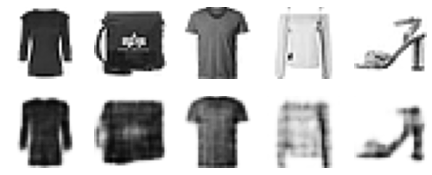

In [9]:
show_reconstructions(conv_ae)
plt.show()